In [12]:
!unzip CovidDataset

Archive:  CovidDataset.zip
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-b

In [26]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [28]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [29]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [30]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [31]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [32]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [33]:
hist = model.fit_generator(
    train_generator,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
7/7 [==============================] - 63s 9s/step - loss: 0.7410 - accuracy: 0.6161 - val_loss: 0.5895 - val_accuracy: 0.9000
Epoch 2/10
7/7 [==============================] - 72s 10s/step - loss: 0.4235 - accuracy: 0.8214 - val_loss: 0.3368 - val_accuracy: 0.9333
Epoch 3/10
7/7 [==============================] - 61s 9s/step - loss: 0.3148 - accuracy: 0.8661 - val_loss: 0.2490 - val_accuracy: 0.9833
Epoch 4/10
7/7 [==============================] - 61s 9s/step - loss: 0.2228 - accuracy: 0.9241 - val_loss: 0.1004 - val_accuracy: 0.9833
Epoch 5/10
7/7 [==============================] - 62s 9s/step - loss: 0.2116 - accuracy: 0.9330 - val_loss: 0.1771 - val_accuracy: 0.9833
Epoch 6/10
7/7 [==============================] - 65s 9s/step - loss: 0.1864 - accuracy: 0.9464 - val_loss: 0.3176 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 62s 9s/step - loss: 0.1318 - accuracy: 0.9464 - val_loss: 0.0854 - val_accuracy: 0.9833
Epoch 8/10
7/7 [=================

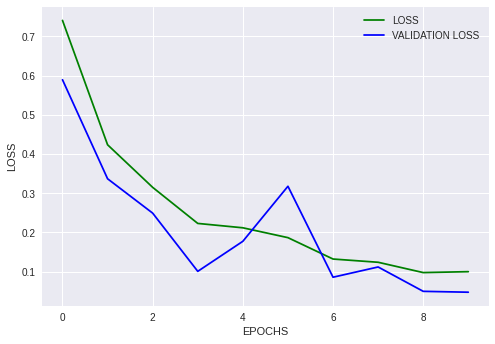

In [36]:
plt.style.use("seaborn")
plt.plot(hist.history['loss'],'g',label= "LOSS")
plt.plot(hist.history['val_loss'],'b',label = "VALIDATION LOSS")
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend()
plt.show()


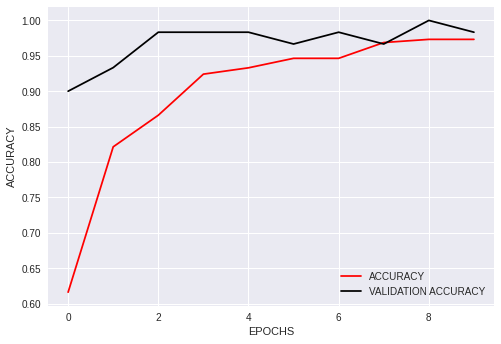

In [37]:
plt.plot(hist.history['accuracy'],'r',label = "ACCURACY")
plt.plot(hist.history['val_accuracy'],'black',label = "VALIDATION ACCURACY")
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.legend()
plt.show()